<a href="https://colab.research.google.com/github/sayeemabdullah/Machine-Learning-Feature-Selection/blob/master/LassoModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best alpha using built-in LassoCV: 155.065594
Best score using built-in LassoCV: 0.035000
Lasso picked 8 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

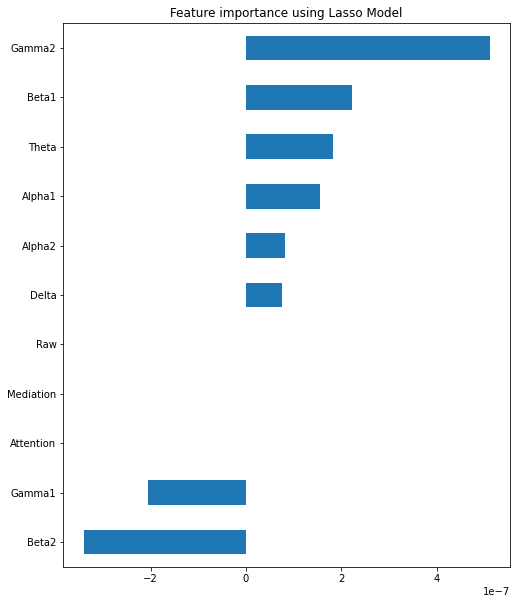

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

url_eeg = 'https://raw.githubusercontent.com/sayeemabdullah/Machine-Learning-Classifiers/master/Dataset/EEG_data.csv'
url_demo = 'https://raw.githubusercontent.com/sayeemabdullah/Machine-Learning-Classifiers/master/Dataset/demographic_info.csv'
df_eeg = pd.read_csv(url_eeg)
df_demo = pd.read_csv(url_demo)
# print(columns)
df_eeg.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis='columns', inplace=True)
columns = df_eeg.columns.drop('user-definedlabeln')
# print(columns)
X = df_eeg.drop('user-definedlabeln',axis=1).values
y = df_eeg['user-definedlabeln'].values

cols = list(columns)
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = cols)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
